In [4]:
import torch
!pip install nltk
!pip install seaborn

DEPRECATION: Loading egg at c:\users\onan\appdata\local\pypoetry\cache\virtualenvs\ai4esg-myrzebvc-py3.11\lib\site-packages\autoawq-0.1.8+cu118-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\onan\appdata\local\pypoetry\cache\virtualenvs\ai4esg-myrzebvc-py3.11\lib\site-packages\autoawq_kernels-0.0.3-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\onan\appdata\local\pypoetry\cache\virtualenvs\ai4esg-myrzebvc-py3.11\lib\site-packages\autoawq-0.1.8+cu118-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\onan\appdata\local\pypoetry\cache\virtualenvs\ai4esg-myrzebvc-py3.11\lib\site-packages\autoawq_kernels-0.0.3-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sys
sys.path.append('../backed')

In [6]:
from backend.modules.annotations.service import get_finished_tasks

finished_tasks = get_finished_tasks()

In [7]:
for key, value in dict(finished_tasks[0].data["annotation"]).items():
    print((key, value))

('relevant_1', 'Yes')
('relevant_2', 'Yes')
('relevant_3', 'Yes')
('applicable', 'Yes')
('rating', 5)


In [8]:
triplets_annotator_1_2 = []
triplets_annotator_1_3 = []
triplets_annotator_2_3 = []
triplets_rating = []
applicable_data = []
ratings = []

# tasks are ordered by annotator_number, 12 tasks per annotator pair
for task in finished_tasks:
    for key, value in dict(task.data["annotation"]).items():
        if key == "rating":
            ratings.append(value)
            triplets_rating.append((task.annotator_number, f"{task.task_number}.rating", value))
            continue    
        else:
            label = f"{task.task_number}.{key}"
            triplet = (task.annotator_number, label, value)
            if key == "applicable":
                model_value = task.data["response"]["answer"]
                applicable_record = ({
                    "annotator": task.annotator_number,
                    "task": label,
                    "value": str(value).lower(),
                    "model_value": str(model_value).lower()
                })
                applicable_data.append(applicable_record)
            
        if task.task_number <= 12:
            triplets_annotator_1_2.append(triplet)
        elif 12 < task.task_number <= 24:
            triplets_annotator_2_3.append(triplet)
        else:
            triplets_annotator_1_3.append(triplet)      

In [9]:
import pandas as pd
df_applicable = pd.DataFrame(applicable_data)

In [10]:
df_applicable

,annotator,task,value,model_value
0,1,1.applicable,yes,yes
1,2,1.applicable,yes,yes
2,1,2.applicable,yes,yes
3,2,2.applicable,yes,yes
4,1,3.applicable,unclear,no
...,...,...,...,...
67,3,34.applicable,unclear,yes
68,1,35.applicable,yes,yes
69,3,35.applicable,unclear,yes
70,1,36.applicable,yes,yes


In [11]:
triplets_annotator_1_2 = sorted(triplets_annotator_1_2, key=lambda x: x[1])
triplets_annotator_2_3 = sorted(triplets_annotator_2_3, key=lambda x: x[1])
triplets_annotator_1_3 = sorted(triplets_annotator_1_3, key=lambda x: x[1])

In [12]:
len(triplets_annotator_1_2)

96

In [13]:
triplets_annotator_1_3

[(1, '25.applicable', 'Unclear'),
 (3, '25.applicable', 'Unclear'),
 (1, '25.relevant_1', 'No'),
 (3, '25.relevant_1', 'No'),
 (1, '25.relevant_2', 'No'),
 (3, '25.relevant_2', 'No'),
 (1, '25.relevant_3', 'No'),
 (3, '25.relevant_3', 'No'),
 (1, '26.applicable', 'Unclear'),
 (3, '26.applicable', 'Unclear'),
 (1, '26.relevant_1', 'No'),
 (3, '26.relevant_1', 'No'),
 (1, '26.relevant_2', 'No'),
 (3, '26.relevant_2', 'No'),
 (1, '26.relevant_3', 'No'),
 (3, '26.relevant_3', 'No'),
 (1, '27.applicable', 'Unclear'),
 (3, '27.applicable', 'Unclear'),
 (1, '27.relevant_1', 'No'),
 (3, '27.relevant_1', 'No'),
 (1, '27.relevant_2', 'No'),
 (3, '27.relevant_2', 'No'),
 (1, '27.relevant_3', 'No'),
 (3, '27.relevant_3', 'No'),
 (1, '28.applicable', 'Unclear'),
 (3, '28.applicable', 'Unclear'),
 (1, '28.relevant_1', 'No'),
 (3, '28.relevant_1', 'No'),
 (1, '28.relevant_2', 'No'),
 (3, '28.relevant_2', 'No'),
 (1, '28.relevant_3', 'No'),
 (3, '28.relevant_3', 'No'),
 (1, '29.applicable', 'Unclear')

In [14]:
ratings

[5,
 4,
 5,
 5,
 None,
 None,
 None,
 None,
 5,
 5,
 3,
 2,
 3,
 None,
 5,
 None,
 None,
 None,
 None,
 5,
 None,
 3,
 None,
 4,
 None,
 None,
 4,
 5,
 None,
 None,
 None,
 3,
 None,
 None,
 None,
 4,
 None,
 None,
 None,
 2,
 None,
 None,
 None,
 4,
 5,
 None,
 None,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 None,
 None,
 None,
 None,
 4,
 None,
 5,
 5,
 None,
 None,
 5,
 None,
 4,
 None,
 5,
 None,
 5,
 5]

In [15]:
print("len all possible ratings: ", len(ratings))

len all possible ratings:  72


In [16]:
ratings_clean = [rating for rating in ratings if rating is not None]

In [17]:
ratings_clean

[5,
 4,
 5,
 5,
 5,
 5,
 3,
 2,
 3,
 5,
 5,
 3,
 4,
 4,
 5,
 3,
 4,
 2,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5]

In [18]:
print(f"all rating tasks: {len(ratings)}")
print(f"finished rating tasks (applicability agreement): {len(ratings_clean)}")
print(f"% agreement with the model (applicability): {len(ratings_clean)/len(ratings)*100}%")

all rating tasks: 72
finished rating tasks (applicability agreement): 35
% agreement with the model (applicability): 48.61111111111111%


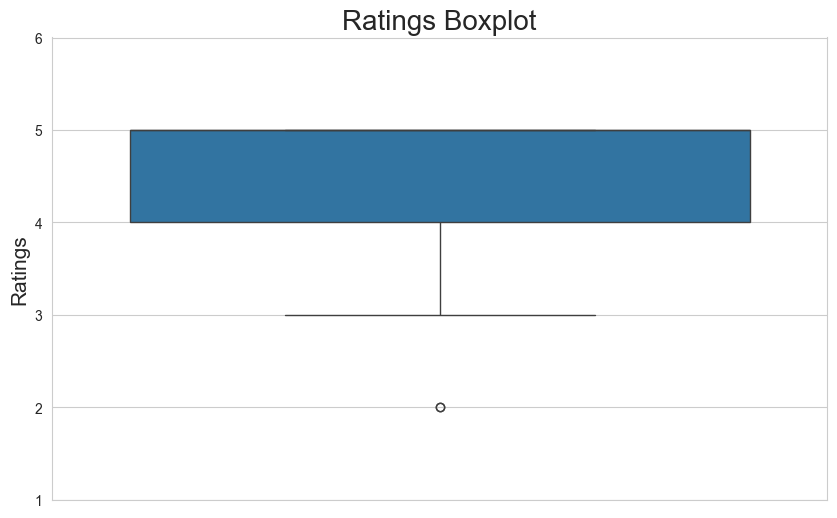

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=ratings_clean)
ax.set_title('Ratings Boxplot', fontsize=20)
ax.set_ylabel('Ratings', fontsize=15)
ax.set_yticks(range(1, 7))

plt.show()

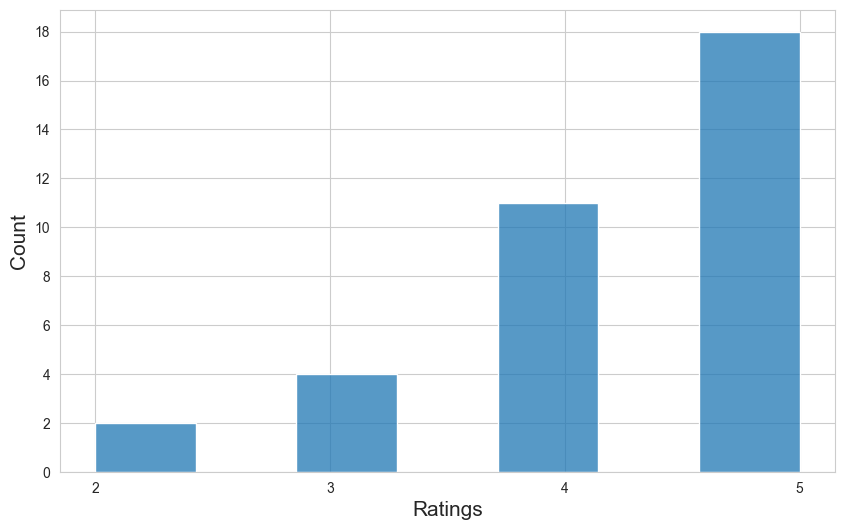

In [159]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=ratings_clean)

ax.set_xlabel('Ratings', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [155]:
print(len(ratings_clean))
print(sum(ratings_clean)/len(ratings_clean))

35
4.285714285714286


In [21]:
from nltk.metrics.agreement import AnnotationTask
from nltk.metrics import interval_distance, binary_distance, masi_distance, jaccard_distance

agreements_1_2 = AnnotationTask(data=triplets_annotator_1_2, distance=binary_distance)
print(f"kappa 1,2: {agreements_1_2.kappa()}")
print(f"alpha 1,2: {agreements_1_2.alpha()}")

kappa 1,2: 0.3753424657534245
alpha 1,2: 0.34884559884559885


In [22]:
agreements_2_3 = AnnotationTask(data=triplets_annotator_2_3, distance=binary_distance)
print(f"kappa 2,3: {agreements_2_3.kappa()}")
print(f"alpha 2,3: {agreements_2_3.alpha()}")

kappa 2,3: 0.3664596273291926
alpha 2,3: 0.34957712444623434


In [23]:
agreements_1_3 = AnnotationTask(data=triplets_annotator_1_3, distance=binary_distance)
print(f"kappa 1,3: {agreements_1_3.kappa()}")
print(f"alpha 1,3: {agreements_1_3.alpha()}")

kappa 1,3: 0.6703296703296703
alpha 1,3: 0.6682960893854748


In [24]:
triplets_annotator_1_2_applicable = [triple for triple in triplets_annotator_1_2 if "applicable" in triple[1]]
triplets_annotator_2_3_applicable = [triple for triple in triplets_annotator_2_3 if "applicable" in triple[1]]
triplets_annotator_1_3_applicable = [triple for triple in triplets_annotator_1_3 if "applicable" in triple[1]]

In [25]:
triplets_annotator_1_2_applicable

[(1, '1.applicable', 'Yes'),
 (2, '1.applicable', 'Yes'),
 (1, '10.applicable', 'Unclear'),
 (2, '10.applicable', 'Yes'),
 (1, '11.applicable', 'Unclear'),
 (2, '11.applicable', 'Yes'),
 (1, '12.applicable', 'Unclear'),
 (2, '12.applicable', 'No'),
 (1, '2.applicable', 'Yes'),
 (2, '2.applicable', 'Yes'),
 (1, '3.applicable', 'Unclear'),
 (2, '3.applicable', 'Unclear'),
 (1, '4.applicable', 'Unclear'),
 (2, '4.applicable', 'Yes'),
 (1, '5.applicable', 'Yes'),
 (2, '5.applicable', 'Yes'),
 (1, '6.applicable', 'Unclear'),
 (2, '6.applicable', 'Unclear'),
 (1, '7.applicable', 'Unclear'),
 (2, '7.applicable', 'Yes'),
 (1, '8.applicable', 'Unclear'),
 (2, '8.applicable', 'Yes'),
 (1, '9.applicable', 'Unclear'),
 (2, '9.applicable', 'Unclear')]

In [26]:
len(triplets_annotator_1_3_applicable)

24

In [27]:
triplets_annotator_1_2_applicable

[(1, '1.applicable', 'Yes'),
 (2, '1.applicable', 'Yes'),
 (1, '10.applicable', 'Unclear'),
 (2, '10.applicable', 'Yes'),
 (1, '11.applicable', 'Unclear'),
 (2, '11.applicable', 'Yes'),
 (1, '12.applicable', 'Unclear'),
 (2, '12.applicable', 'No'),
 (1, '2.applicable', 'Yes'),
 (2, '2.applicable', 'Yes'),
 (1, '3.applicable', 'Unclear'),
 (2, '3.applicable', 'Unclear'),
 (1, '4.applicable', 'Unclear'),
 (2, '4.applicable', 'Yes'),
 (1, '5.applicable', 'Yes'),
 (2, '5.applicable', 'Yes'),
 (1, '6.applicable', 'Unclear'),
 (2, '6.applicable', 'Unclear'),
 (1, '7.applicable', 'Unclear'),
 (2, '7.applicable', 'Yes'),
 (1, '8.applicable', 'Unclear'),
 (2, '8.applicable', 'Yes'),
 (1, '9.applicable', 'Unclear'),
 (2, '9.applicable', 'Unclear')]

In [28]:
triplets_annotator_2_3_applicable

[(2, '13.applicable', 'Unclear'),
 (3, '13.applicable', 'Unclear'),
 (2, '14.applicable', 'No'),
 (3, '14.applicable', 'No'),
 (2, '15.applicable', 'Yes'),
 (3, '15.applicable', 'Unclear'),
 (2, '16.applicable', 'Yes'),
 (3, '16.applicable', 'No'),
 (2, '17.applicable', 'Unclear'),
 (3, '17.applicable', 'Unclear'),
 (2, '18.applicable', 'Yes'),
 (3, '18.applicable', 'Unclear'),
 (2, '19.applicable', 'Unclear'),
 (3, '19.applicable', 'Unclear'),
 (2, '20.applicable', 'Yes'),
 (3, '20.applicable', 'Unclear'),
 (2, '21.applicable', 'Yes'),
 (3, '21.applicable', 'Yes'),
 (2, '22.applicable', 'Yes'),
 (3, '22.applicable', 'Unclear'),
 (2, '23.applicable', 'Yes'),
 (3, '23.applicable', 'Unclear'),
 (2, '24.applicable', 'Unclear'),
 (3, '24.applicable', 'Yes')]

In [29]:
# agreements applicable 1,2 interval data
def map_interval_data(triplets):
    triplets_mapped = []
    for triple in triplets:
        if str(triple[2]).lower() == "no":
            triplets_mapped.append((triple[0], triple[1], 0))
        elif str(triple[2]).lower() == "yes":
            triplets_mapped.append((triple[0], triple[1], 2))
        else:
            triplets_mapped.append((triple[0], triple[1], 1))
    return triplets_mapped

# Percent agreement

In [30]:
percent_agree_1_2 = sum(1 if triplets_annotator_1_2_applicable[i][2] == triplets_annotator_1_2_applicable[i+1][2] else 0 for i in range(0, len(triplets_annotator_1_2_applicable)-1, 2)) / (len(triplets_annotator_1_2_applicable)//2)

percent_agree_2_3 = sum(1 if triplets_annotator_2_3_applicable[i][2] == triplets_annotator_2_3_applicable[i+1][2] else 0 for i in range(0, len(triplets_annotator_2_3_applicable)-1, 2)) / (len(triplets_annotator_2_3_applicable)//2)

percent_agree_1_3 = sum(1 if triplets_annotator_1_3_applicable[i][2] == triplets_annotator_1_3_applicable[i+1][2] else 0 for i in range(0, len(triplets_annotator_1_3_applicable)-1, 2)) / (len(triplets_annotator_1_3_applicable)//2)

print(f"Percent agreement 1,2: {percent_agree_1_2*100}%")
print(f"Percent agreement 2,3: {percent_agree_2_3*100}%")
print(f"Percent agreement 1,3: {percent_agree_1_3*100}%")

Percent agreement 1,2: 50.0%
Percent agreement 2,3: 41.66666666666667%
Percent agreement 1,3: 66.66666666666666%


In [31]:
triplets_annotator_1_2_applicable_interval = map_interval_data(triplets_annotator_1_2_applicable)
triplets_annotator_2_3_applicable_interval = map_interval_data(triplets_annotator_2_3_applicable)
triplets_annotator_1_3_applicable_interval = map_interval_data(triplets_annotator_1_3_applicable)

In [32]:
def interval_similarity(x, y):
    return 1 - abs(x - y)/2

In [33]:
percent_agree_1_2 = sum(interval_similarity(triplets_annotator_1_2_applicable_interval[i][2], triplets_annotator_1_2_applicable_interval[i+1][2]) for i in range(0, len(triplets_annotator_1_2_applicable_interval)-1, 2)) / (len(triplets_annotator_1_2_applicable_interval)//2)

percent_agree_2_3 = sum(interval_similarity(triplets_annotator_2_3_applicable_interval[i][2], triplets_annotator_2_3_applicable_interval[i+1][2]) for i in range(0, len(triplets_annotator_2_3_applicable_interval)-1, 2)) / (len(triplets_annotator_2_3_applicable_interval)//2)

percent_agree_1_3 = sum(interval_similarity(triplets_annotator_1_3_applicable_interval[i][2], triplets_annotator_1_3_applicable_interval[i+1][2]) for i in range(0, len(triplets_annotator_1_3_applicable_interval)-1, 2)) / (len(triplets_annotator_1_3_applicable_interval)//2)

print(f"Interval Percent agreement 1,2 (applicable): {percent_agree_1_2*100}%")
print(f"Interval Percent agreement 2,3 (applicable): {percent_agree_2_3*100}%")
print(f"Interval Percent agreement 1,3 (applicable): {percent_agree_1_3*100}%")

Interval Percent agreement 1,2 (applicable): 75.0%
Interval Percent agreement 2,3 (applicable): 66.66666666666666%
Interval Percent agreement 1,3 (applicable): 83.33333333333334%


## Applicable agreement excluding unclear values

In [34]:
# excluding unclear values
triplets_annotator_1_2_applicable_no_unk = [triple for triple in triplets_annotator_1_2_applicable if triple[2] != "Unclear"]
triplets_annotator_2_3_applicable_no_unk = [triple for triple in triplets_annotator_2_3_applicable if triple[2] != "Unclear"]
triplets_annotator_1_3_applicable_no_unk = [triple for triple in triplets_annotator_1_3_applicable if triple[2] != "Unclear"]

In [35]:
triplets_annotator_1_2_applicable_no_unk

[(1, '1.applicable', 'Yes'),
 (2, '1.applicable', 'Yes'),
 (2, '10.applicable', 'Yes'),
 (2, '11.applicable', 'Yes'),
 (2, '12.applicable', 'No'),
 (1, '2.applicable', 'Yes'),
 (2, '2.applicable', 'Yes'),
 (2, '4.applicable', 'Yes'),
 (1, '5.applicable', 'Yes'),
 (2, '5.applicable', 'Yes'),
 (2, '7.applicable', 'Yes'),
 (2, '8.applicable', 'Yes')]

In [36]:
# remove tasks without pair annotation
def remove_no_pair_annotations(triplets):
    new_triplets = []
    for i in range(0, len(triplets)-1):
        if triplets[i][1] == triplets[i+1][1]:
            new_triplets.append(triplets[i])
            new_triplets.append(triplets[i+1])
    return new_triplets

In [37]:
triplets_annotator_1_2_applicable_no_unk = remove_no_pair_annotations(triplets_annotator_1_2_applicable_no_unk)
triplets_annotator_2_3_applicable_no_unk = remove_no_pair_annotations(triplets_annotator_2_3_applicable_no_unk)
triplets_annotator_1_3_applicable_no_unk = remove_no_pair_annotations(triplets_annotator_1_3_applicable_no_unk)

In [151]:
triplets_annotator_2_3_applicable_no_unk

[(2, '14.applicable', 'No'),
 (3, '14.applicable', 'No'),
 (2, '16.applicable', 'Yes'),
 (3, '16.applicable', 'No'),
 (2, '21.applicable', 'Yes'),
 (3, '21.applicable', 'Yes')]

## applicability agreement excluding unclear values

In [38]:
print(f'num tasks 1,2 applicable no unk: {len(triplets_annotator_1_2_applicable_no_unk)/2}')
print(f'num tasks 2,3 applicable no unk: {len(triplets_annotator_2_3_applicable_no_unk)/2}')
print(f'num tasks 1,3 applicable no unk: {len(triplets_annotator_1_3_applicable_no_unk)/2}')

print(f'num tasks 1,2 applicable: {len(triplets_annotator_1_2_applicable)/2}')
print(f'num tasks 2,3 applicable: {len(triplets_annotator_2_3_applicable)/2}')
print(f'num tasks 1,3 applicable: {len(triplets_annotator_1_3_applicable)/2}')

num tasks 1,2 applicable no unk: 3.0
num tasks 2,3 applicable no unk: 3.0
num tasks 1,3 applicable no unk: 2.0
num tasks 1,2 applicable: 12.0
num tasks 2,3 applicable: 12.0
num tasks 1,3 applicable: 12.0


In [152]:
agreements_1_2_no_unk = AnnotationTask(data=triplets_annotator_1_2_applicable_no_unk, distance=binary_distance)
ao_kappa_1_2 = agreements_1_2_no_unk.Ao(1, 2)
ae_kappa_1_2 = agreements_1_2_no_unk.Ae_kappa(1, 2)
kappa = (ao_kappa_1_2 - ae_kappa_1_2) / (1.0 - ae_kappa_1_2 + 0.0000000000000000000001)
print(f"kappa 1,2: {ao_kappa_1_2}")
print(f"alpha 1,2: {agreements_1_2_no_unk.alpha()}")
agreements_2_3_no_unk = AnnotationTask(data=triplets_annotator_2_3_applicable_no_unk, distance=binary_distance)
ao_kappa_2_3 = agreements_2_3_no_unk.Ao(2, 3)
ae_kappa_2_3 = agreements_2_3_no_unk.Ae_kappa(2, 3)
kappa = (ao_kappa_2_3 - ae_kappa_2_3) / (1.0 - ae_kappa_2_3 + 0.0000000000000000000001)
print(f"kappa 2,3: {ao_kappa_2_3}")
print(f"alpha 2,3: {agreements_2_3_no_unk.alpha()}")
agreements_1_3_no_unk = AnnotationTask(data=triplets_annotator_1_3_applicable_no_unk, distance=binary_distance)
ao_kappa_1_3 = agreements_1_3_no_unk.Ao(1, 3)
ae_kappa_1_3 = agreements_1_3_no_unk.Ae_kappa(1, 3)
kappa = (ao_kappa_1_3 - ae_kappa_1_3) / (1.0 - ae_kappa_1_3 + 0.0000000000000000000001)
print(f"kappa 1,3: {ao_kappa_1_3}")
print(f"alpha 1,3: {agreements_1_3_no_unk.alpha()}")

kappa 1,2: 1.0
alpha 1,2: 1
kappa 2,3: 0.6666666666666666
alpha 2,3: 0.4444444444444444
kappa 1,3: 1.0
alpha 1,3: 1


In [150]:
percent_agree_1_2 = sum(1 if triplets_annotator_1_2_applicable_no_unk[i][2] == triplets_annotator_1_2_applicable_no_unk[i+1][2] else 0 for i in range(0, len(triplets_annotator_1_2_applicable_no_unk)-1, 2)) / (len(triplets_annotator_1_2_applicable_no_unk)//2)

percent_agree_2_3 = sum(1 if triplets_annotator_2_3_applicable_no_unk[i][2] == triplets_annotator_2_3_applicable_no_unk[i+1][2] else 0 for i in range(0, len(triplets_annotator_2_3_applicable_no_unk)-1, 2)) / (len(triplets_annotator_2_3_applicable_no_unk)//2)

percent_agree_1_3 = sum(1 if triplets_annotator_1_3_applicable_no_unk[i][2] == triplets_annotator_1_3_applicable_no_unk[i+1][2] else 0 for i in range(0, len(triplets_annotator_1_3_applicable_no_unk)-1, 2)) / (len(triplets_annotator_1_3_applicable_no_unk)//2)

print(f"Percent agreement 1,2: {percent_agree_1_2*100}%")
print(f"Percent agreement 2,3: {percent_agree_2_3*100}%")
print(f"Percent agreement 1,3: {percent_agree_1_3*100}%")

Percent agreement 1,2: 100.0%
Percent agreement 2,3: 66.66666666666666%
Percent agreement 1,3: 100.0%


# Do sanity check what happens if we have all agreements, also change the num of tasks

In [146]:
test_users = [1 if i%2 == 0 else 2 for i in range(24)]
test_labels = [[f"task_{i}",f"task_{i}"] for i in range(1, 13)]
test_labels = [item for sublist in test_labels for item in sublist]
#test_values = [2 if i%2 == 0 else 0 for i in range(24)]
#test_values = [2 for i in range(12)] + [0 for i in range(12)]
test_values = [0 for i in range(8)] + [1 for i in range(8, 16)] + [2 for i in range(16, 24)]
triplets_annotator_test = [*zip(test_users, test_labels, test_values)]

In [147]:
#triplets_annotator_test[len(triplets_annotator_test)-1] = (2, 'task_12', 'Unclear')

In [148]:
last_idx = len(triplets_annotator_test)-1
triplets_annotator_test[0] = (1, 'task_1', 0)
#triplets_annotator_test[4] = (1, 'task_3', 2)
#triplets_annotator_test[6] = (1, 'task_4', 1)
#triplets_annotator_test[8] = (1, 'task_5', 1)
#triplets_annotator_test[last_idx-6] = (2, 'task_9', 1)
triplets_annotator_test

[(1, 'task_1', 0),
 (2, 'task_1', 0),
 (1, 'task_2', 0),
 (2, 'task_2', 0),
 (1, 'task_3', 0),
 (2, 'task_3', 0),
 (1, 'task_4', 0),
 (2, 'task_4', 0),
 (1, 'task_5', 1),
 (2, 'task_5', 1),
 (1, 'task_6', 1),
 (2, 'task_6', 1),
 (1, 'task_7', 1),
 (2, 'task_7', 1),
 (1, 'task_8', 1),
 (2, 'task_8', 1),
 (1, 'task_9', 2),
 (2, 'task_9', 2),
 (1, 'task_10', 2),
 (2, 'task_10', 2),
 (1, 'task_11', 2),
 (2, 'task_11', 2),
 (1, 'task_12', 2),
 (2, 'task_12', 2)]

In [149]:
agreements_test = AnnotationTask(data=triplets_annotator_test, distance=binary_distance)
ao_kappa = agreements_test.Ao(1, 2)
ae_kappa = agreements_test.Ae_kappa(1, 2)
kappa = (ao_kappa - ae_kappa) / (1.0 - ae_kappa + 0.0000000001)
print(f"Observed agreement kappa test: {ao_kappa}")
print(f"Expected agreement kappa test: {ae_kappa}")
print(f"manual kappa test: {kappa}")
print(f"kappa test: {agreements_test.kappa()}")
print(f"alpha test: {agreements_test.alpha()}")

Observed agreement kappa test: 1.0
Expected agreement kappa test: 0.3333333333333333
manual kappa test: 0.99999999985
kappa test: 1.0
alpha test: 1.0


In [45]:
N = len(triplets_annotator_test)//2 #Divide by number of annotators
count_agreements = sum(1 if triplets_annotator_test[i][2] == triplets_annotator_test[i+1][2] else 0 for i in range(0, (N*2)-1, 2))
count_agreements

12

In [46]:
p_o = count_agreements / N
p_o

1.0

In [47]:
p_no = (sum(1 if (triplets_annotator_test[i][2] == 0 and triplets_annotator_test[i][0] == 1) else 0 for i in range(len(triplets_annotator_test))) * sum(1 if (triplets_annotator_test[i][2] == 0 and triplets_annotator_test[i][0] == 2) else 0 for i in range(len(triplets_annotator_test))))/ N**2

p_yes = (sum(1 if (triplets_annotator_test[i][2] == 2 and triplets_annotator_test[i][0] == 1) else 0 for i in range(len(triplets_annotator_test))) * sum(1 if (triplets_annotator_test[i][2] == 2 and triplets_annotator_test[i][0] == 2) else 0 for i in range(len(triplets_annotator_test))))/ N**2

p_unk = (sum(1 if (triplets_annotator_test[i][2] == 1 and triplets_annotator_test[i][0] == 1) else 0 for i in range(len(triplets_annotator_test))) * sum(1 if (triplets_annotator_test[i][2] == 1 and triplets_annotator_test[i][0] == 2) else 0 for i in range(len(triplets_annotator_test))))/ N**2

p_e = p_no + p_yes + p_unk
p_e

0.3333333333333333

In [48]:
k = 1 - ((1 - p_o) / (1 - p_e + 0.0000000001))
k = (p_o - p_e) / (1 - p_e + 0.0000000001)
k

0.99999999985

In [49]:
agreements_1_2_applicable = AnnotationTask(data=triplets_annotator_1_2_applicable, distance=binary_distance)
print(f"kappa 1,2 (applicable): {agreements_1_2_applicable.kappa()}")
print(f"alpha 1,2 (applicable): {agreements_1_2_applicable.alpha()}")

kappa 1,2 (applicable): 0.22580645161290328
alpha 1,2 (applicable): 0.10967741935483877


In [50]:
agreements_1_2_applicable_interval = AnnotationTask(data=map_interval_data(triplets_annotator_1_2_applicable), distance=interval_distance)
print(f"Interval: kappa 1,2 (applicable): {agreements_1_2_applicable_interval.kappa()}")
print(f"Interval: alpha 1,2 (applicable): {agreements_1_2_applicable_interval.alpha()}")

Interval: kappa 1,2 (applicable): 0.22580645161290328
Interval: alpha 1,2 (applicable): 0.26595744680851063


In [51]:
agreements_2_3_applicable = AnnotationTask(data=triplets_annotator_2_3_applicable, distance=binary_distance)
print(f"kappa 2,3 (applicable): {agreements_2_3_applicable.kappa()}")
print(f"alpha 2,3 (applicable): {agreements_2_3_applicable.alpha()}")

kappa 2,3 (applicable): 0.12500000000000003
alpha 2,3 (applicable): 0.058479532163742576


In [125]:
agreements_1_3_applicable = AnnotationTask(data=triplets_annotator_1_3_applicable, distance=binary_distance)
print(f"kappa 1,3 (applicable): {agreements_1_3_applicable.kappa()}")
print(f"alpha 1,3 (applicable): {agreements_1_3_applicable.alpha()}")

kappa 1,3 (applicable): 0.33333333333333326
alpha 1,3 (applicable): 0.28125


TypeError: AnnotationTask.Disagreement() missing 1 required positional argument: 'label_freqs'

In [52]:
agreements_2_3_applicable_interval = AnnotationTask(data=map_interval_data(triplets_annotator_2_3_applicable), distance=interval_distance)
print(f"Interval: kappa 2,3 (applicable): {agreements_2_3_applicable_interval.kappa()}")
print(f"Interval: alpha 2,3 (applicable): {agreements_2_3_applicable_interval.alpha()}")

Interval: kappa 2,3 (applicable): -0.24999999999999997
Interval: alpha 2,3 (applicable): 0.08730158730158721


In [54]:
agreements_1_3_applicable_interval = AnnotationTask(data=map_interval_data(triplets_annotator_1_3_applicable), distance=interval_distance)
print(f"Interval: kappa 1,3 (applicable): {agreements_1_3_applicable_interval.kappa()}")
print(f"Interval: alpha 1,3 (applicable): {agreements_1_3_applicable_interval.alpha()}")

Interval: kappa 1,3 (applicable): 0.33333333333333326
Interval: alpha 1,3 (applicable): 0.28125


In [55]:
triplets_annotator_1_2_relevant = [triple for triple in triplets_annotator_1_2 if "relevant" in triple[1]]
triplets_annotator_2_3_relevant = [triple for triple in triplets_annotator_2_3 if "relevant" in triple[1]]
triplets_annotator_1_3_relevant = [triple for triple in triplets_annotator_1_3 if "relevant" in triple[1]]

In [56]:
triplets_annotator_1_2_relevant

[(1, '1.relevant_1', 'Yes'),
 (2, '1.relevant_1', 'Yes'),
 (1, '1.relevant_2', 'Yes'),
 (2, '1.relevant_2', 'Yes'),
 (1, '1.relevant_3', 'Yes'),
 (2, '1.relevant_3', 'Yes'),
 (1, '10.relevant_1', 'No'),
 (2, '10.relevant_1', 'Yes'),
 (1, '10.relevant_2', 'No'),
 (2, '10.relevant_2', 'Yes'),
 (1, '10.relevant_3', 'No'),
 (2, '10.relevant_3', 'Yes'),
 (1, '11.relevant_1', 'No'),
 (2, '11.relevant_1', 'Yes'),
 (1, '11.relevant_2', 'No'),
 (2, '11.relevant_2', 'Yes'),
 (1, '11.relevant_3', 'No'),
 (2, '11.relevant_3', 'Yes'),
 (1, '12.relevant_1', 'No'),
 (2, '12.relevant_1', 'Yes'),
 (1, '12.relevant_2', 'No'),
 (2, '12.relevant_2', 'No'),
 (1, '12.relevant_3', 'No'),
 (2, '12.relevant_3', 'No'),
 (1, '2.relevant_1', 'Yes'),
 (2, '2.relevant_1', 'Yes'),
 (1, '2.relevant_2', 'Yes'),
 (2, '2.relevant_2', 'Yes'),
 (1, '2.relevant_3', 'No'),
 (2, '2.relevant_3', 'No'),
 (1, '3.relevant_1', 'No'),
 (2, '3.relevant_1', 'No'),
 (1, '3.relevant_2', 'No'),
 (2, '3.relevant_2', 'No'),
 (1, '3.relev

In [57]:
agreements_1_2_relevant = AnnotationTask(data=triplets_annotator_1_2_relevant, distance=binary_distance)
print(f"kappa 1,2 (relevant): {agreements_1_2_relevant.kappa()}")
print(f"alpha 1,2 (relevant): {agreements_1_2_relevant.alpha()}")

kappa 1,2 (relevant): 0.3076923076923076
alpha 1,2 (relevant): 0.2738001573564123


In [58]:
agreements_2_3_relevant = AnnotationTask(data=triplets_annotator_2_3_relevant, distance=binary_distance)
print(f"kappa 2,3 (relevant): {agreements_2_3_relevant.kappa()}")
print(f"alpha 2,3 (relevant): {agreements_2_3_relevant.alpha()}")

kappa 2,3 (relevant): 0.2274678111587981
alpha 2,3 (relevant): 0.2075892857142857


In [59]:
agreements_1_3_relevant = AnnotationTask(data=triplets_annotator_1_3_relevant, distance=binary_distance)
print(f"kappa 1,3 (relevant): {agreements_1_3_relevant.kappa()}")
print(f"alpha 1,3 (relevant): {agreements_1_3_relevant.alpha()}")

kappa 1,3 (relevant): 0.653846153846154
alpha 1,3 (relevant): 0.6542207792207793


In [60]:
all_annotations = triplets_annotator_1_2 + triplets_annotator_2_3 + triplets_annotator_1_3

In [61]:
all_annotations

[(1, '1.applicable', 'Yes'),
 (2, '1.applicable', 'Yes'),
 (1, '1.relevant_1', 'Yes'),
 (2, '1.relevant_1', 'Yes'),
 (1, '1.relevant_2', 'Yes'),
 (2, '1.relevant_2', 'Yes'),
 (1, '1.relevant_3', 'Yes'),
 (2, '1.relevant_3', 'Yes'),
 (1, '10.applicable', 'Unclear'),
 (2, '10.applicable', 'Yes'),
 (1, '10.relevant_1', 'No'),
 (2, '10.relevant_1', 'Yes'),
 (1, '10.relevant_2', 'No'),
 (2, '10.relevant_2', 'Yes'),
 (1, '10.relevant_3', 'No'),
 (2, '10.relevant_3', 'Yes'),
 (1, '11.applicable', 'Unclear'),
 (2, '11.applicable', 'Yes'),
 (1, '11.relevant_1', 'No'),
 (2, '11.relevant_1', 'Yes'),
 (1, '11.relevant_2', 'No'),
 (2, '11.relevant_2', 'Yes'),
 (1, '11.relevant_3', 'No'),
 (2, '11.relevant_3', 'Yes'),
 (1, '12.applicable', 'Unclear'),
 (2, '12.applicable', 'No'),
 (1, '12.relevant_1', 'No'),
 (2, '12.relevant_1', 'Yes'),
 (1, '12.relevant_2', 'No'),
 (2, '12.relevant_2', 'No'),
 (1, '12.relevant_3', 'No'),
 (2, '12.relevant_3', 'No'),
 (1, '2.applicable', 'Yes'),
 (2, '2.applicable'

In [62]:
agreements_all = AnnotationTask(data=all_annotations, distance=binary_distance)
print(f"alpha all: {agreements_all.alpha()}")

alpha all: 0.46883926775296725


In [63]:
all_annotations_applicable = triplets_annotator_1_2_applicable + triplets_annotator_2_3_applicable + triplets_annotator_1_3_applicable
all_annotations_applicable = sorted(all_annotations_applicable, key=lambda x: int(str(x[1]).split('.')[0]))

In [64]:
all_annotations_applicable

[(1, '1.applicable', 'Yes'),
 (2, '1.applicable', 'Yes'),
 (1, '2.applicable', 'Yes'),
 (2, '2.applicable', 'Yes'),
 (1, '3.applicable', 'Unclear'),
 (2, '3.applicable', 'Unclear'),
 (1, '4.applicable', 'Unclear'),
 (2, '4.applicable', 'Yes'),
 (1, '5.applicable', 'Yes'),
 (2, '5.applicable', 'Yes'),
 (1, '6.applicable', 'Unclear'),
 (2, '6.applicable', 'Unclear'),
 (1, '7.applicable', 'Unclear'),
 (2, '7.applicable', 'Yes'),
 (1, '8.applicable', 'Unclear'),
 (2, '8.applicable', 'Yes'),
 (1, '9.applicable', 'Unclear'),
 (2, '9.applicable', 'Unclear'),
 (1, '10.applicable', 'Unclear'),
 (2, '10.applicable', 'Yes'),
 (1, '11.applicable', 'Unclear'),
 (2, '11.applicable', 'Yes'),
 (1, '12.applicable', 'Unclear'),
 (2, '12.applicable', 'No'),
 (2, '13.applicable', 'Unclear'),
 (3, '13.applicable', 'Unclear'),
 (2, '14.applicable', 'No'),
 (3, '14.applicable', 'No'),
 (2, '15.applicable', 'Yes'),
 (3, '15.applicable', 'Unclear'),
 (2, '16.applicable', 'Yes'),
 (3, '16.applicable', 'No'),
 (

In [65]:
agreements_all_applicable = AnnotationTask(data=all_annotations_applicable, distance=binary_distance)
print(f"alpha all (applicable): {agreements_all_applicable.alpha()}")

alpha all (applicable): 0.1329022988505747


In [66]:
all_annotations_applicable_interval = map_interval_data(all_annotations_applicable)
all_annotations_applicable_interval

[(1, '1.applicable', 2),
 (2, '1.applicable', 2),
 (1, '2.applicable', 2),
 (2, '2.applicable', 2),
 (1, '3.applicable', 1),
 (2, '3.applicable', 1),
 (1, '4.applicable', 1),
 (2, '4.applicable', 2),
 (1, '5.applicable', 2),
 (2, '5.applicable', 2),
 (1, '6.applicable', 1),
 (2, '6.applicable', 1),
 (1, '7.applicable', 1),
 (2, '7.applicable', 2),
 (1, '8.applicable', 1),
 (2, '8.applicable', 2),
 (1, '9.applicable', 1),
 (2, '9.applicable', 1),
 (1, '10.applicable', 1),
 (2, '10.applicable', 2),
 (1, '11.applicable', 1),
 (2, '11.applicable', 2),
 (1, '12.applicable', 1),
 (2, '12.applicable', 0),
 (2, '13.applicable', 1),
 (3, '13.applicable', 1),
 (2, '14.applicable', 0),
 (3, '14.applicable', 0),
 (2, '15.applicable', 2),
 (3, '15.applicable', 1),
 (2, '16.applicable', 2),
 (3, '16.applicable', 0),
 (2, '17.applicable', 1),
 (3, '17.applicable', 1),
 (2, '18.applicable', 2),
 (3, '18.applicable', 1),
 (2, '19.applicable', 1),
 (3, '19.applicable', 1),
 (2, '20.applicable', 2),
 (3,

In [67]:
agreements_all_applicable_interval = AnnotationTask(data=all_annotations_applicable_interval, distance=interval_distance)
print(f"alpha all (applicable interval): {agreements_all_applicable_interval.alpha()}")

alpha all (applicable interval): 0.1782407407407407


In [68]:
all_annotations_relevant = triplets_annotator_1_2_relevant + triplets_annotator_2_3_relevant + triplets_annotator_1_3_relevant

In [69]:
all_annotations_relevant

[(1, '1.relevant_1', 'Yes'),
 (2, '1.relevant_1', 'Yes'),
 (1, '1.relevant_2', 'Yes'),
 (2, '1.relevant_2', 'Yes'),
 (1, '1.relevant_3', 'Yes'),
 (2, '1.relevant_3', 'Yes'),
 (1, '10.relevant_1', 'No'),
 (2, '10.relevant_1', 'Yes'),
 (1, '10.relevant_2', 'No'),
 (2, '10.relevant_2', 'Yes'),
 (1, '10.relevant_3', 'No'),
 (2, '10.relevant_3', 'Yes'),
 (1, '11.relevant_1', 'No'),
 (2, '11.relevant_1', 'Yes'),
 (1, '11.relevant_2', 'No'),
 (2, '11.relevant_2', 'Yes'),
 (1, '11.relevant_3', 'No'),
 (2, '11.relevant_3', 'Yes'),
 (1, '12.relevant_1', 'No'),
 (2, '12.relevant_1', 'Yes'),
 (1, '12.relevant_2', 'No'),
 (2, '12.relevant_2', 'No'),
 (1, '12.relevant_3', 'No'),
 (2, '12.relevant_3', 'No'),
 (1, '2.relevant_1', 'Yes'),
 (2, '2.relevant_1', 'Yes'),
 (1, '2.relevant_2', 'Yes'),
 (2, '2.relevant_2', 'Yes'),
 (1, '2.relevant_3', 'No'),
 (2, '2.relevant_3', 'No'),
 (1, '3.relevant_1', 'No'),
 (2, '3.relevant_1', 'No'),
 (1, '3.relevant_2', 'No'),
 (2, '3.relevant_2', 'No'),
 (1, '3.relev

In [70]:
agreements_all_relevant = AnnotationTask(data=all_annotations_relevant, distance=binary_distance)
print(f"alpha all (relevant): {agreements_all_relevant.alpha()}")

alpha all (relevant): 0.410401891252955


In [71]:
triplets_rating = list(filter(lambda x: x[2] is not None, triplets_rating))
triplets_rating

[(1, '1.rating', 5),
 (2, '1.rating', 4),
 (1, '2.rating', 5),
 (2, '2.rating', 5),
 (1, '5.rating', 5),
 (2, '5.rating', 5),
 (1, '6.rating', 3),
 (2, '6.rating', 2),
 (1, '7.rating', 3),
 (1, '8.rating', 5),
 (2, '10.rating', 5),
 (2, '11.rating', 3),
 (2, '12.rating', 4),
 (2, '14.rating', 4),
 (3, '14.rating', 5),
 (3, '16.rating', 3),
 (3, '18.rating', 4),
 (3, '20.rating', 2),
 (3, '22.rating', 4),
 (2, '23.rating', 5),
 (3, '24.rating', 4),
 (1, '25.rating', 5),
 (3, '25.rating', 4),
 (1, '26.rating', 5),
 (3, '26.rating', 4),
 (1, '27.rating', 5),
 (3, '27.rating', 4),
 (1, '30.rating', 4),
 (1, '31.rating', 5),
 (3, '31.rating', 5),
 (1, '33.rating', 5),
 (1, '34.rating', 4),
 (1, '35.rating', 5),
 (1, '36.rating', 5),
 (3, '36.rating', 5)]

In [72]:
from nltk.metrics.agreement import AnnotationTask
from nltk.metrics import interval_distance, binary_distance

agreements_rating = AnnotationTask(data=triplets_rating, distance=interval_distance)
print(f"alpha rating: {agreements_rating.alpha()}")

alpha rating: 0.5615384615384615


## Compare model values to annotator values

In [73]:
df_applicable

,annotator,task,value,model_value
0,1,1.applicable,yes,yes
1,2,1.applicable,yes,yes
2,1,2.applicable,yes,yes
3,2,2.applicable,yes,yes
4,1,3.applicable,unclear,no
...,...,...,...,...
67,3,34.applicable,unclear,yes
68,1,35.applicable,yes,yes
69,3,35.applicable,unclear,yes
70,1,36.applicable,yes,yes


In [74]:
df_applicable["value"] = df_applicable["value"].map({"yes": 2, "no": 0, "unclear": 1})
df_applicable["model_value"] = df_applicable["model_value"].map({"yes": 2, "no": 0, "unclear": 1})

In [75]:
import torch

targets = torch.tensor(df_applicable["value"].to_list(), dtype=torch.int)
preds = torch.tensor(df_applicable["model_value"].to_list(), dtype=torch.int)

In [76]:
print(targets)
print(preds)
print(targets.shape)

tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0,
        1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2],
       dtype=torch.int32)
tensor([2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=torch.int32)
torch.Size([72])


In [160]:
len(targets)

72

In [82]:
from torchmetrics import MetricCollection
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score

metrics = MetricCollection({
    "accuracy": Accuracy(task= "multiclass", num_classes=3, average="macro"),
    "precision": Precision(task= "multiclass", num_classes=3, average="macro"),
    "recall": Recall(task= "multiclass", num_classes=3, average="macro"),
    "f1": F1Score(task= "multiclass", num_classes=3, average="macro")
})

f1 = F1Score(task= "multiclass", num_classes=3, average="macro")
accuracy = Accuracy(task= "multiclass", num_classes=3, average="macro")
precision = Precision(task= "multiclass", num_classes=3, average="macro")
recall = Recall(task= "multiclass", num_classes=3, average="macro")

In [83]:
metrics(preds, targets)

{'accuracy': tensor(0.6560),
 'f1': tensor(0.4540),
 'precision': tensor(0.4865),
 'recall': tensor(0.6560)}

In [84]:
# calculate accuracy manually

correct = sum(1 if preds[i] == targets[i] else 0 for i in range(len(preds)))
accuracy_num = correct / len(preds)
accuracy_num

0.4861111111111111

In [85]:
# calculate accuracy manually macro
results = []

for i in range(3):
    correct = sum(1 if preds[j] == targets[j] else 0 for j in range(len(preds)) if targets[j] == i)
    total = sum(1 for j in range(len(preds)) if targets[j] == i)
    print(f'accuracy class {i}: {correct/total}')
    results.append(correct/total)
    
print(f'accuracy macro: {sum(results)/3}')    

accuracy class 0: 1.0
accuracy class 1: 0.325
accuracy class 2: 0.6428571428571429
accuracy macro: 0.655952380952381


In [86]:
print(f'Accuracy: {accuracy(preds, targets)}')
print(f'F1: {f1(preds, targets)}')
print(f'Precision: {precision(preds, targets)}')
print(f'Recall: {recall(preds, targets)}')

Accuracy: 0.6559523940086365
F1: 0.4539682865142822
Precision: 0.48650795221328735
Recall: 0.6559523940086365


In [87]:
from sklearn.metrics import classification_report

print(classification_report(targets, preds, target_names=["no", "unclear", "yes"]))

              precision    recall  f1-score   support

          no       0.17      1.00      0.29         4
     unclear       0.65      0.33      0.43        40
         yes       0.64      0.64      0.64        28

    accuracy                           0.49        72
   macro avg       0.49      0.66      0.45        72
weighted avg       0.62      0.49      0.51        72



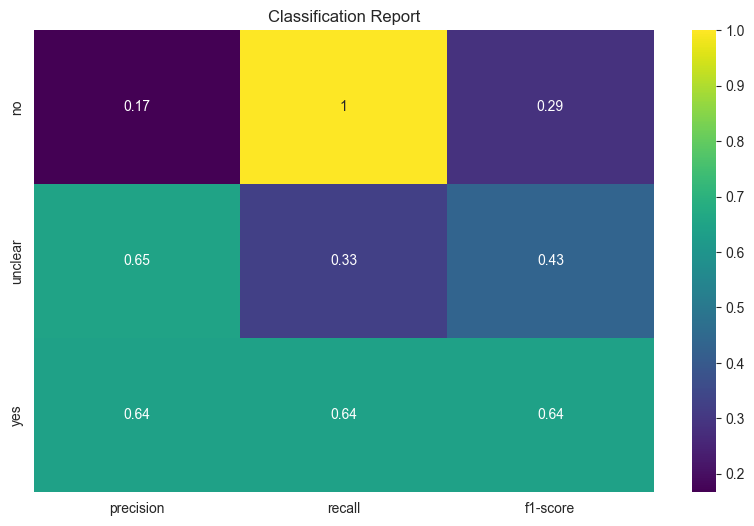

In [88]:
#show graphically the results of the classification report
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(targets, preds, target_names=["no", "unclear", "yes"], output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop(columns=["support"], inplace=True)
df.drop(index="accuracy", inplace=True)
df.drop(index="macro avg", inplace=True)
df.drop(index="weighted avg", inplace=True)
df = df.astype(float)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="viridis")
plt.title("Classification Report")
plt.show()

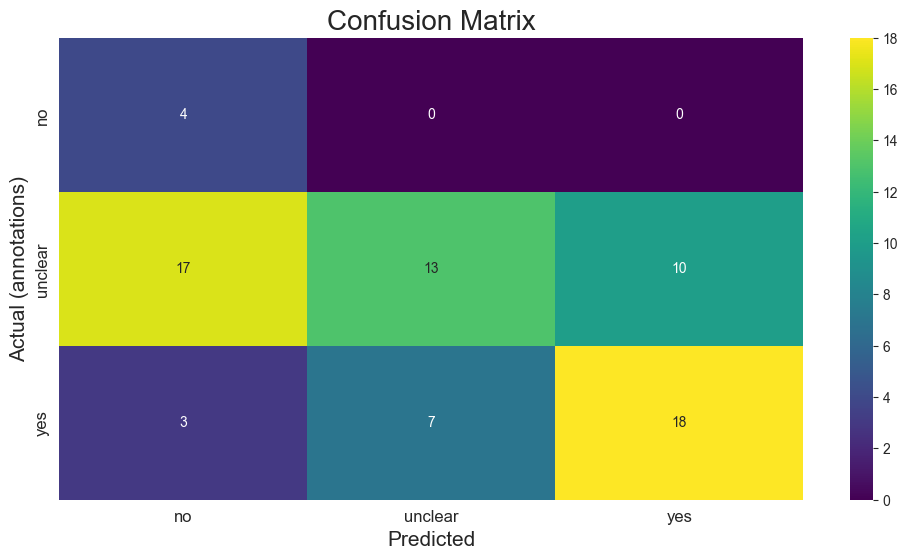

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(targets, preds)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["no", "unclear", "yes"], yticklabels=["no", "unclear", "yes"])
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual (annotations)", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

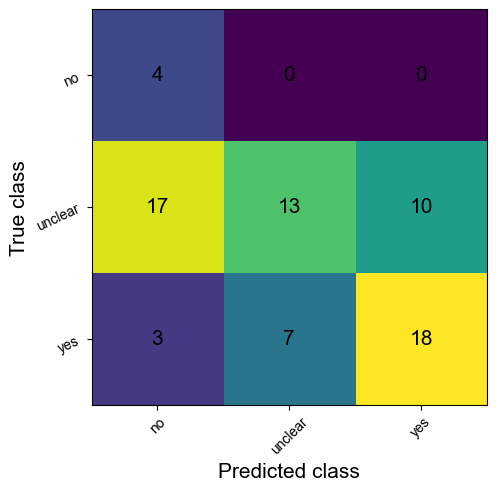

In [90]:
from torchmetrics.classification import MulticlassConfusionMatrix
metric = MulticlassConfusionMatrix(num_classes=3)
metric.update(preds, targets)
fig_, ax_ = metric.plot(labels=["no", "unclear", "yes"])

## Remove annotations with unclear values

In [91]:
from torchmetrics import MetricCollection
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score

binary_metrics = MetricCollection({
    "accuracy": Accuracy(task= "binary"),
    "precision": Precision(task= "binary"),
    "recall": Recall(task= "binary"),
    "f1": F1Score(task= "binary")
})

binary_f1 = F1Score(task= "binary")
binary_accuracy = Accuracy(task= "binary")
binary_precision = Precision(task= "binary")
binary_recall = Recall(task= "binary")

In [92]:
df_applicable_yes_no = df_applicable[(df_applicable["value"] != 1) & (df_applicable["model_value"] != 1)]

In [93]:
df_applicable_yes_no

,annotator,task,value,model_value
0,1,1.applicable,2,2
1,2,1.applicable,2,2
2,1,2.applicable,2,2
3,2,2.applicable,2,2
7,2,4.applicable,2,0
8,1,5.applicable,2,2
9,2,5.applicable,2,2
19,2,10.applicable,2,2
21,2,11.applicable,2,2
23,2,12.applicable,0,0


In [94]:
targets_yes_no = torch.tensor(df_applicable_yes_no["value"].to_list(), dtype=torch.int)
preds_yes_no = torch.tensor(df_applicable_yes_no["model_value"].to_list(), dtype=torch.int)
targets_yes_no = torch.tensor([1 if x > 1 else x for x in targets_yes_no], dtype=torch.int)
preds_yes_no = torch.tensor([1 if x > 1 else x for x in preds_yes_no], dtype=torch.int)

In [95]:
preds_yes_no

tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1], dtype=torch.int32)

In [96]:
targets_yes_no

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1], dtype=torch.int32)

In [97]:
targets_yes_no.shape

torch.Size([25])

In [98]:
binary_metrics(preds_yes_no, targets_yes_no)

{'accuracy': tensor(0.8800),
 'f1': tensor(0.9231),
 'precision': tensor(1.),
 'recall': tensor(0.8571)}

In [99]:
print(f'Binary Accuracy: {binary_accuracy(preds_yes_no, targets_yes_no)}')
print(f'Binary F1: {binary_f1(preds_yes_no, targets_yes_no)}')
print(f'Binary Precision: {binary_precision(preds_yes_no, targets_yes_no)}')
print(f'Binary Recall: {binary_recall(preds_yes_no, targets_yes_no)}')

Binary Accuracy: 0.8799999952316284
Binary F1: 0.9230769276618958
Binary Precision: 1.0
Binary Recall: 0.8571428656578064


In [100]:
print(classification_report(targets_yes_no, preds_yes_no, target_names=["no", "yes"], labels=[0, 1]))

              precision    recall  f1-score   support

          no       0.57      1.00      0.73         4
         yes       1.00      0.86      0.92        21

    accuracy                           0.88        25
   macro avg       0.79      0.93      0.83        25
weighted avg       0.93      0.88      0.89        25



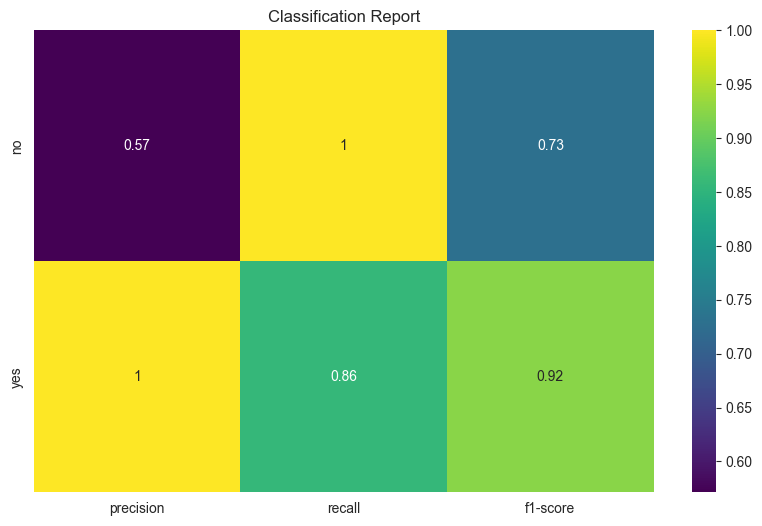

In [101]:
#show graphically the results of the classification report
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(targets_yes_no, preds_yes_no, target_names=["no", "yes"], labels=[0, 1], output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop(columns=["support"], inplace=True)
df.drop(index="macro avg", inplace=True)
df.drop(index="weighted avg", inplace=True)
df.drop(index="accuracy", inplace=True)
df = df.astype(float)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="viridis")
plt.title("Classification Report")
plt.show()

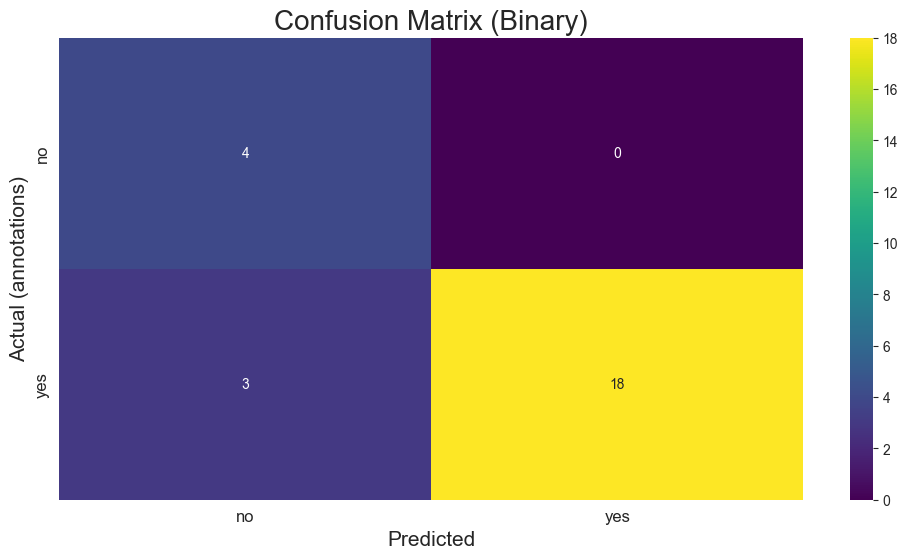

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(targets_yes_no, preds_yes_no)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual (annotations)", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix (Binary)", fontsize=20)
plt.show()

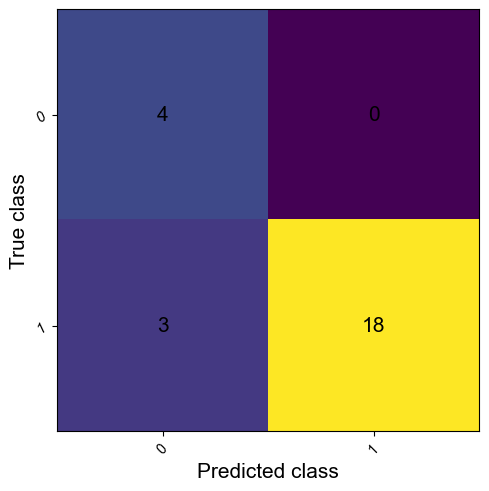

In [103]:
from torchmetrics.classification import ConfusionMatrix
metric = ConfusionMatrix(task="binary")
metric.update(preds_yes_no, targets_yes_no)
fig_, ax_ = metric.plot()

# Count relevant chunks

In [104]:
all_annotations_relevant

[(1, '1.relevant_1', 'Yes'),
 (2, '1.relevant_1', 'Yes'),
 (1, '1.relevant_2', 'Yes'),
 (2, '1.relevant_2', 'Yes'),
 (1, '1.relevant_3', 'Yes'),
 (2, '1.relevant_3', 'Yes'),
 (1, '10.relevant_1', 'No'),
 (2, '10.relevant_1', 'Yes'),
 (1, '10.relevant_2', 'No'),
 (2, '10.relevant_2', 'Yes'),
 (1, '10.relevant_3', 'No'),
 (2, '10.relevant_3', 'Yes'),
 (1, '11.relevant_1', 'No'),
 (2, '11.relevant_1', 'Yes'),
 (1, '11.relevant_2', 'No'),
 (2, '11.relevant_2', 'Yes'),
 (1, '11.relevant_3', 'No'),
 (2, '11.relevant_3', 'Yes'),
 (1, '12.relevant_1', 'No'),
 (2, '12.relevant_1', 'Yes'),
 (1, '12.relevant_2', 'No'),
 (2, '12.relevant_2', 'No'),
 (1, '12.relevant_3', 'No'),
 (2, '12.relevant_3', 'No'),
 (1, '2.relevant_1', 'Yes'),
 (2, '2.relevant_1', 'Yes'),
 (1, '2.relevant_2', 'Yes'),
 (2, '2.relevant_2', 'Yes'),
 (1, '2.relevant_3', 'No'),
 (2, '2.relevant_3', 'No'),
 (1, '3.relevant_1', 'No'),
 (2, '3.relevant_1', 'No'),
 (1, '3.relevant_2', 'No'),
 (2, '3.relevant_2', 'No'),
 (1, '3.relev

In [105]:
# get task numbers
task_numbers = list(set([int(triple[1].split('.')[0]) for triple in all_annotations_relevant]))

In [106]:
# sort by task number
all_annotations_relevant_sorted = sorted(all_annotations_relevant, key=lambda x: int(x[1].split('.')[0]))

In [107]:
all_annotations_relevant_sorted

[(1, '1.relevant_1', 'Yes'),
 (2, '1.relevant_1', 'Yes'),
 (1, '1.relevant_2', 'Yes'),
 (2, '1.relevant_2', 'Yes'),
 (1, '1.relevant_3', 'Yes'),
 (2, '1.relevant_3', 'Yes'),
 (1, '2.relevant_1', 'Yes'),
 (2, '2.relevant_1', 'Yes'),
 (1, '2.relevant_2', 'Yes'),
 (2, '2.relevant_2', 'Yes'),
 (1, '2.relevant_3', 'No'),
 (2, '2.relevant_3', 'No'),
 (1, '3.relevant_1', 'No'),
 (2, '3.relevant_1', 'No'),
 (1, '3.relevant_2', 'No'),
 (2, '3.relevant_2', 'No'),
 (1, '3.relevant_3', 'No'),
 (2, '3.relevant_3', 'No'),
 (1, '4.relevant_1', 'Yes'),
 (2, '4.relevant_1', 'Yes'),
 (1, '4.relevant_2', 'Yes'),
 (2, '4.relevant_2', 'No'),
 (1, '4.relevant_3', 'No'),
 (2, '4.relevant_3', 'No'),
 (1, '5.relevant_1', 'Yes'),
 (2, '5.relevant_1', 'Yes'),
 (1, '5.relevant_2', 'Yes'),
 (2, '5.relevant_2', 'Yes'),
 (1, '5.relevant_3', 'No'),
 (2, '5.relevant_3', 'No'),
 (1, '6.relevant_1', 'Yes'),
 (2, '6.relevant_1', 'No'),
 (1, '6.relevant_2', 'No'),
 (2, '6.relevant_2', 'No'),
 (1, '6.relevant_3', 'No'),
 (

In [108]:
len(task_numbers)

36

In [109]:
task_to_annotators = {}

In [113]:
# count relevant tasks
count_relevant = 0
count_not_relevant = 0
for task in task_numbers:
    annotators_for_task = list(set([x[0] for x in all_annotations_relevant_sorted if int(x[1].split('.')[0]) == task]))
    for annotator in annotators_for_task:
        relevant = False
        for triple in all_annotations_relevant_sorted:
            if int(triple[1].split('.')[0]) == task and triple[0] == annotator:
                if str(triple[2]).lower() == "yes":
                    relevant = True
        if relevant:
            print(f'task {task} annotator {annotator} relevant')
            count_relevant += 1
        else:
            print(f'task {task} annotator {annotator} not relevant')
            count_not_relevant += 1

task 1 annotator 1 relevant
task 1 annotator 2 relevant
task 2 annotator 1 relevant
task 2 annotator 2 relevant
task 3 annotator 1 not relevant
task 3 annotator 2 not relevant
task 4 annotator 1 relevant
task 4 annotator 2 relevant
task 5 annotator 1 relevant
task 5 annotator 2 relevant
task 6 annotator 1 relevant
task 6 annotator 2 not relevant
task 7 annotator 1 relevant
task 7 annotator 2 relevant
task 8 annotator 1 not relevant
task 8 annotator 2 relevant
task 9 annotator 1 not relevant
task 9 annotator 2 relevant
task 10 annotator 1 not relevant
task 10 annotator 2 relevant
task 11 annotator 1 not relevant
task 11 annotator 2 relevant
task 12 annotator 1 not relevant
task 12 annotator 2 relevant
task 13 annotator 2 not relevant
task 13 annotator 3 relevant
task 14 annotator 2 relevant
task 14 annotator 3 relevant
task 15 annotator 2 relevant
task 15 annotator 3 not relevant
task 16 annotator 2 relevant
task 16 annotator 3 relevant
task 17 annotator 2 not relevant
task 17 annotator

In [114]:
count_relevant/(count_relevant + count_not_relevant)

0.5694444444444444

In [115]:
count_yes = sum(1 if str(triple[2]).lower() == "yes" else 0 for triple in all_annotations_relevant_sorted)
count_no = sum(1 if str(triple[2]).lower() == "no" else 0 for triple in all_annotations_relevant_sorted)

count_yes/len(all_annotations_relevant_sorted)

0.3472222222222222

In [ ]:
# count at least one relevant per task and annotator
count_relevant = 0
count_all = 0

# Remove unclear tasks for relevance analysys

In [120]:
task_numbers_yes_no = df_applicable_yes_no["task"].to_list()

In [121]:
task_numbers_yes_no = list(set([int(task.split('.')[0]) for task in task_numbers_yes_no]))

In [122]:
task_numbers_yes_no

[1, 2, 33, 4, 5, 34, 35, 36, 10, 11, 12, 14, 15, 16, 23, 24, 30, 31]

In [123]:
# count relevant tasks
count_relevant = 0
count_not_relevant = 0
for task in task_numbers_yes_no:
    annotators_for_task = list(set([x[0] for x in all_annotations_relevant_sorted if int(x[1].split('.')[0]) == task]))
    for annotator in annotators_for_task:
        relevant = False
        for triple in all_annotations_relevant_sorted:
            if int(triple[1].split('.')[0]) == task and triple[0] == annotator:
                if str(triple[2]).lower() == "yes":
                    relevant = True
        if relevant:
            print(f'task {task} annotator {annotator} relevant')
            count_relevant += 1
        else:
            print(f'task {task} annotator {annotator} not relevant')
            count_not_relevant += 1

task 1 annotator 1 relevant
task 1 annotator 2 relevant
task 2 annotator 1 relevant
task 2 annotator 2 relevant
task 33 annotator 1 relevant
task 33 annotator 3 not relevant
task 4 annotator 1 relevant
task 4 annotator 2 relevant
task 5 annotator 1 relevant
task 5 annotator 2 relevant
task 34 annotator 1 relevant
task 34 annotator 3 relevant
task 35 annotator 1 relevant
task 35 annotator 3 relevant
task 36 annotator 1 relevant
task 36 annotator 3 relevant
task 10 annotator 1 not relevant
task 10 annotator 2 relevant
task 11 annotator 1 not relevant
task 11 annotator 2 relevant
task 12 annotator 1 not relevant
task 12 annotator 2 relevant
task 14 annotator 2 relevant
task 14 annotator 3 relevant
task 15 annotator 2 relevant
task 15 annotator 3 not relevant
task 16 annotator 2 relevant
task 16 annotator 3 relevant
task 23 annotator 2 relevant
task 23 annotator 3 not relevant
task 24 annotator 2 relevant
task 24 annotator 3 relevant
task 30 annotator 1 relevant
task 30 annotator 3 relevan

In [124]:
count_relevant/(count_relevant + count_not_relevant)

0.8333333333333334